# <span style="color:red">Wichtiger Hinweis: Dieses Notebook erst später anschauen!</span>

### Dieses Notebook zeigt dir, wie ich die Daten aufbereitet habe. Dabei verwende ich aber Funktionen, die du zum aktuellen Zeitpunkt noch nicht kennst. 

### Dieses Notebook dient primär der Vollständigkeit - und damit du dich (nach Abschluss des Kurses) überzeugen kannst, dass es sich bei den Daten tatsächlich um echte Daten handelt ;) 

### Ich empfehle dir, dieses Notebook dir erst später im Verlauf des Kurses nochmal anzuschauen!


In [25]:
# Datenquelle: https://www.kaggle.com/orgesleka/used-cars-database

import pandas as pd

df = pd.read_csv("./../data/autos.csv", encoding="iso-8859-1")
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [26]:
# Zuerst wählen wir die Spalten aus, die uns tatsächlich interessieren

df = df[["price", "yearOfRegistration", "powerPS", "kilometer", "model", "fuelType", "name"]]

In [27]:
# Dann filtern wir unrealistische Daten heraus
df = df[df["price"] < 50000]
df = df[df["powerPS"] < 300]
df = df[df["powerPS"] > 30]
df = df[df["yearOfRegistration"] < 2020]
df = df[df["yearOfRegistration"] > 1970]

# Einen Kilometerstand von 150.000km haben erstaunlich viele Autos. Theorie: Autos mit 300.000km werden auch unter 150.000km geführt
df = df[df["kilometer"] <= 140000]

# Dann nehmen wir eine Stichprobe (250 Autos) aus der Datei heraus
# Dadurch können wir später den Rest einfacher visualisieren und das Diagramm ist nicht "überfüllt"
df = df.sample(250)

In [28]:
# Und speichern es als .csv - Datei
df.to_csv("./autos_prepared.csv", index = False)

In [29]:
print(len(df))

250


In [30]:
df.head()

,price,yearOfRegistration,powerPS,kilometer,model,fuelType,name
174574,1450,1997,75,90000,andere,benzin,Toyota_Toyota_Starlet_1._Hand__TÜV_neu
273748,13100,2005,280,5000,golf,benzin,R32_tauschen_oder_kaufen
242943,4500,2008,87,90000,yaris,benzin,Toyota_Yaris_1.3_VVT_i
637,6000,2009,177,125000,3er,diesel,320_Alpinweiss_Kohlenstoff
217928,3990,1999,118,90000,3er,benzin,BMW_318i_E46_+++_1._Hand_+++_Liebhaberfahrzeug


In [31]:
from sklearn.linear_model import LinearRegression
d = df.sample(250)

X = d[["kilometer"]].values
Y = d[["price"]].values

model = LinearRegression()
model.fit(X, Y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

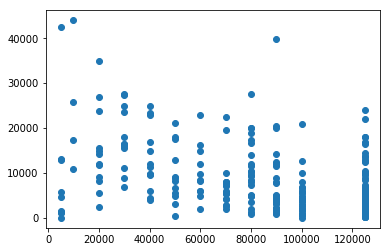

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X, Y)
# plt.plot([[0], [300]], model.predict([[0], [300]]))
plt.show()

In [33]:
# Test, ob wir coole Ergebnisse dann später auch herausbekommen ;) 

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, Y)

model.predict([[10000], [100000]])

array([[ 15109.0127408 ],
       [  7191.58672534]])